<a href="https://colab.research.google.com/github/hnidey13/tesis_SVD_t-SVDM/blob/main/SVD_PCA_etiquetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Limpiamos área de trabajo

In [ ]:
rm(list=ls())
options(scipen=999)

Matriz de datos

In [ ]:
A <- matrix(c( 1,1,1,0,0, 3,3,3,0,0, 4,4,4,0,0, 5,5,5,0,0,
               0,2,0,4,4, 0,0,0,5,5, 0,1,0,2,2), 7, 5, byrow=TRUE)
colnames(A) <- c("Serenity","Dune","Alien","Casablanca","Amelie")
A
Ac <- scale(A, center = TRUE, scale = FALSE)
round(colMeans(Ac),4)

Serenity,Dune,Alien,Casablanca,Amelie
1,1,1,0,0
3,3,3,0,0
4,4,4,0,0
5,5,5,0,0
0,2,0,4,4
0,0,0,5,5
0,1,0,2,2


Serenity       Dune      Alien Casablanca     Amelie 
         0          0          0          0          0

SVD $A$

In [ ]:
SVD_A <- svd(A)
round(SVD_A$d,2)
round(SVD_A$u,2)
round(SVD_A$v,2)

[1] 12.48  9.51  1.35  0.00  0.00

-0.14,-0.02,-0.01,0.56,-0.38
-0.41,-0.07,-0.03,0.21,0.76
-0.55,-0.09,-0.04,-0.72,-0.18
-0.69,-0.12,-0.05,0.34,-0.23
-0.15,0.59,0.65,0.00,0.20
-0.07,0.73,-0.68,0.00,0.00
-0.08,0.30,0.33,0.00,-0.40


-0.56,-0.13,-0.41,-0.71,0.00
-0.59,0.03,0.80,0.00,0.00
-0.56,-0.13,-0.41,0.71,0.00
-0.09,0.70,-0.09,0.00,-0.71
-0.09,0.70,-0.09,0.00,0.71


SVD $A_c$

In [ ]:
SVD_Ac <- svd(Ac)
round(SVD_A$d,2)
round(SVD_Ac$u,2)
round(SVD_Ac$v,2)

[1] 12.48  9.51  1.35  0.00  0.00

0.01,-0.69,-0.16,-0.70,-0.03
0.26,-0.14,-0.08,0.20,-0.05
0.39,0.13,-0.04,-0.05,-0.45
0.52,0.41,0.00,-0.41,0.63
-0.39,0.29,0.69,-0.42,-0.17
-0.55,0.35,-0.66,-0.19,0.09
-0.25,-0.34,0.24,0.29,0.60


0.47,0.36,-0.39,0.71,0.00
0.37,0.41,0.83,0.00,0.00
0.47,0.36,-0.39,-0.71,0.00
-0.46,0.54,-0.06,0.00,-0.71
-0.46,0.54,-0.06,0.00,0.71


PCA de $A$

In [ ]:
princomp(A)$loadings
round(eigen(cov(A))$vectors,4)


Loadings:
           Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
Serenity    0.471  0.356  0.389  0.707       
Dune        0.374  0.412 -0.831              
Alien       0.471  0.356  0.389 -0.707       
Casablanca -0.456  0.537               -0.707
Amelie     -0.456  0.537                0.707

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
SS loadings       1.0    1.0    1.0    1.0    1.0
Proportion Var    0.2    0.2    0.2    0.2    0.2
Cumulative Var    0.2    0.4    0.6    0.8    1.0

-0.4715,-0.3558,0.3887,0.0000,0.7071
-0.3737,-0.4124,-0.8308,0.0000,0.0000
-0.4715,-0.3558,0.3887,0.0000,-0.7071
0.4559,-0.5370,0.0615,-0.7071,0.0000
0.4559,-0.5370,0.0615,0.7071,0.0000


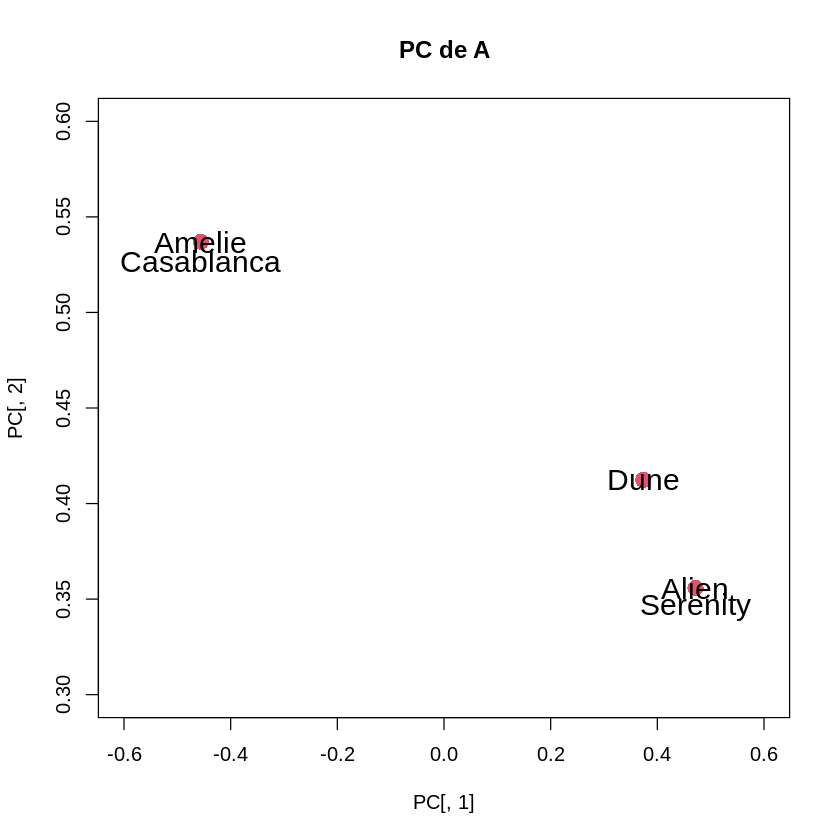

In [ ]:
set.seed(1234)
PC <- princomp(A)$loadings
plot(PC[,1],PC[,2], main = "PC de A", cex = 1.8, pch=16, col = 2, xlim = c(-.6,.6), ylim = c(.3,.6))
text(PC[,1],PC[,2]-c(.01,0,0,.01,0), colnames(A), cex = 1.5)

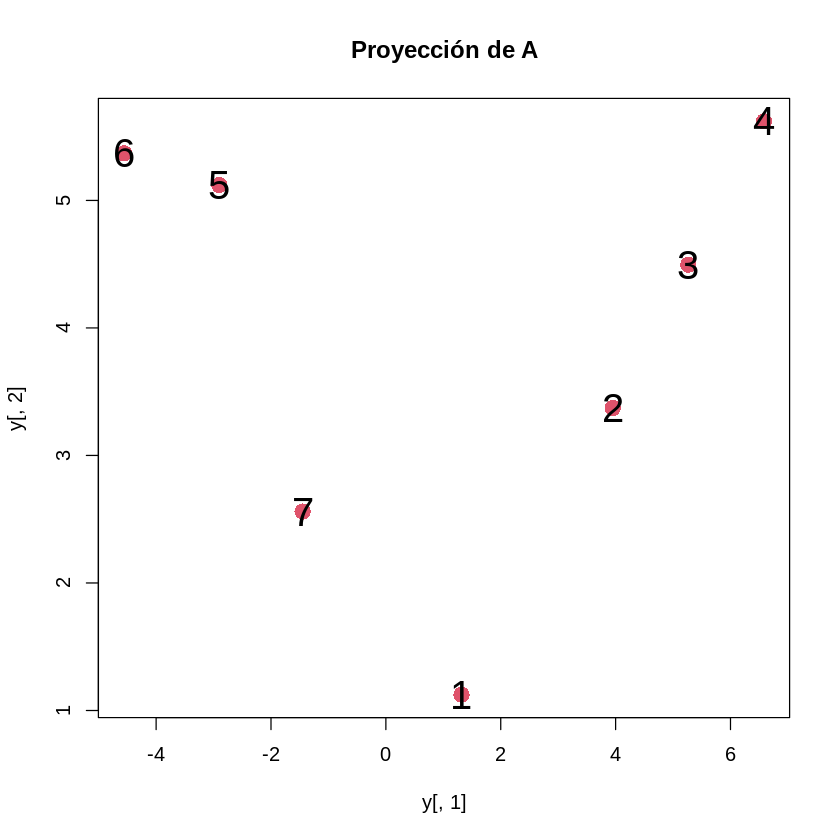

In [ ]:
y <- A %*% PC #Proyección
plot(y[,1],y[,2], main = "Proyección de A", cex = 1.8, pch=16, col = 2)
text(y[,1],y[,2], cex = 2)

PCA de $A^T$

-0.1050,-0.0463,-0.2321,0.0000,0.0000,0.9659,0.0000
-0.3149,-0.1389,0.8822,0.0000,0.0000,0.1711,-0.2722
-0.4198,-0.1852,0.0992,0.0000,0.0000,-0.0307,0.8824
-0.5248,-0.2314,-0.2811,0.0995,-0.7001,-0.1357,-0.2713
0.3609,-0.8184,0.0000,-0.4428,-0.0629,0.0000,0.0000
0.5248,0.2314,0.2811,0.0995,-0.7001,0.1357,0.2713
0.1805,-0.4092,0.0000,0.8855,0.1258,0.0000,0.0000


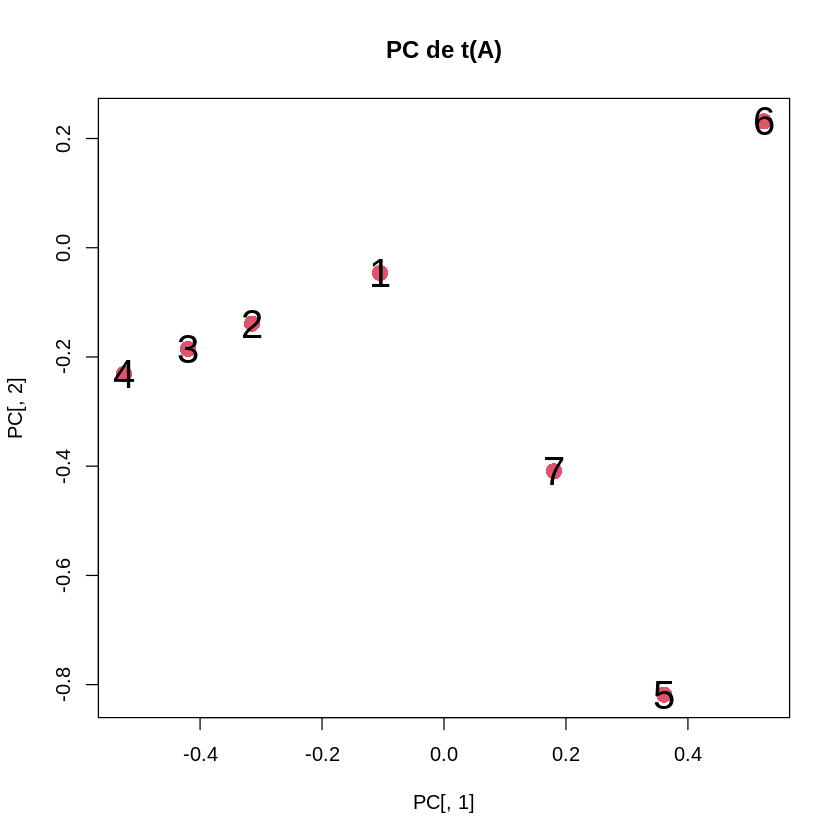

In [ ]:
round(eigen(cov(t(A)))$vectors,4)
PC <- prcomp(t(A))$rotation #No se por que varían
plot(PC[,1],PC[,2], main = "PC de t(A)", cex = 1.8, pch=16, col = 2)
text(PC[,1],PC[,2], cex = 2)

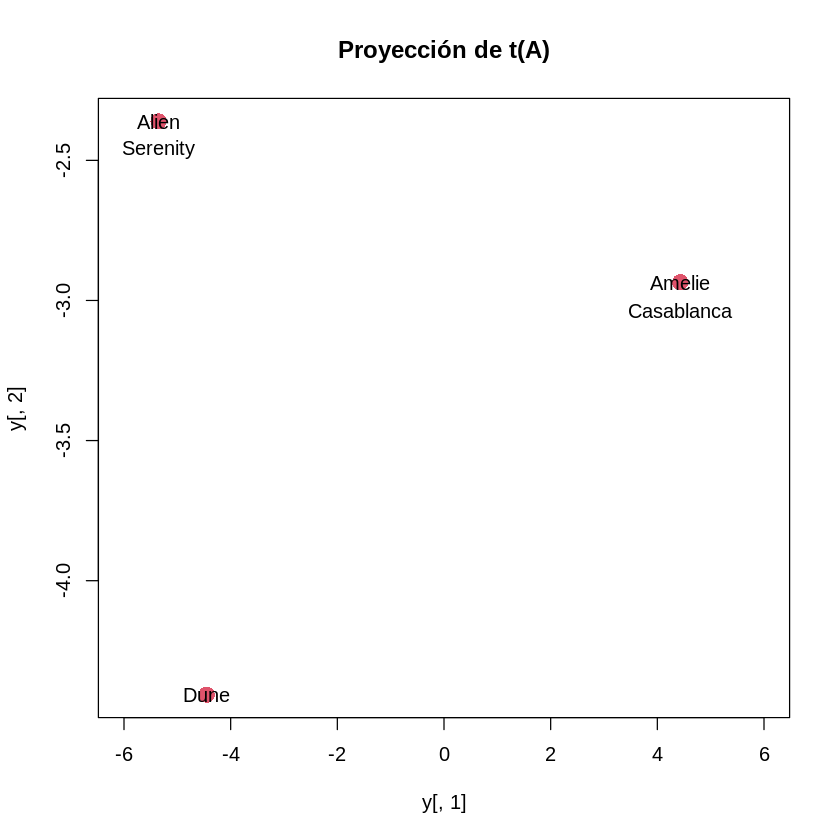

In [ ]:
y <- t(A) %*% PC
plot(y[,1],y[,2], main = "Proyección de t(A)", cex = 1.8, pch=16, col = 2, xlim = c(-6,6))
text(y[,1],y[,2]-c(.1,0,0,.1,0), rownames(y))

Gráfica de SVD de $A$ $(V)$

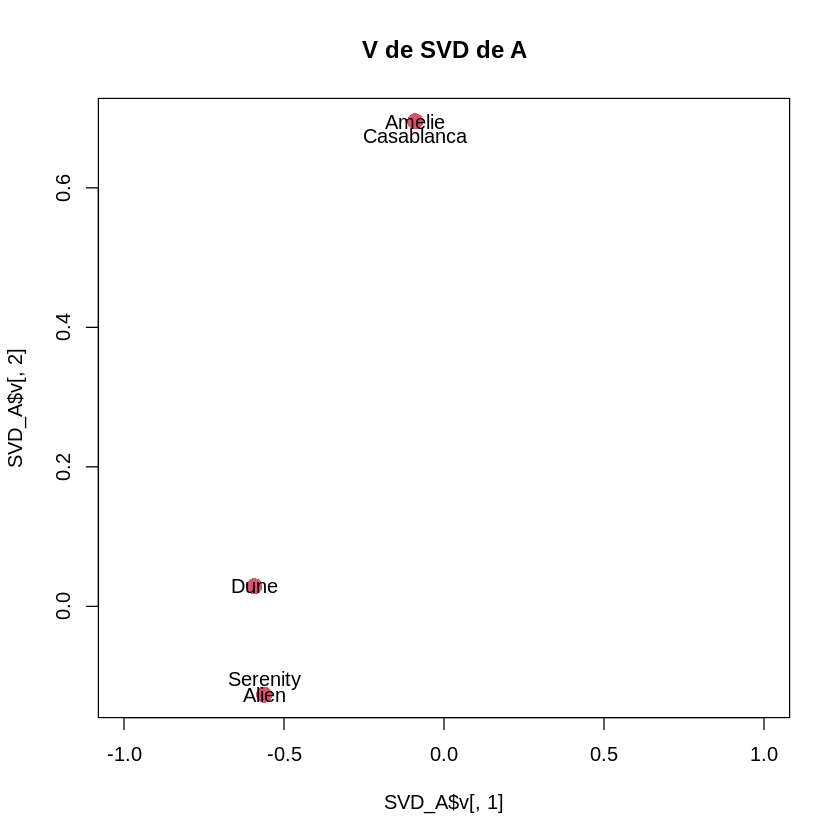

In [ ]:
plot(SVD_A$v[,1],SVD_A$v[,2], main = "V de SVD de A", cex = 1.8, pch=16, col = 2, xlim = c(-1,1))
text(SVD_A$v[,1],SVD_A$v[,2]-c(-.02,0,0,.02,0), colnames(A))

Gráfica de SVD de $A$ $(U)$

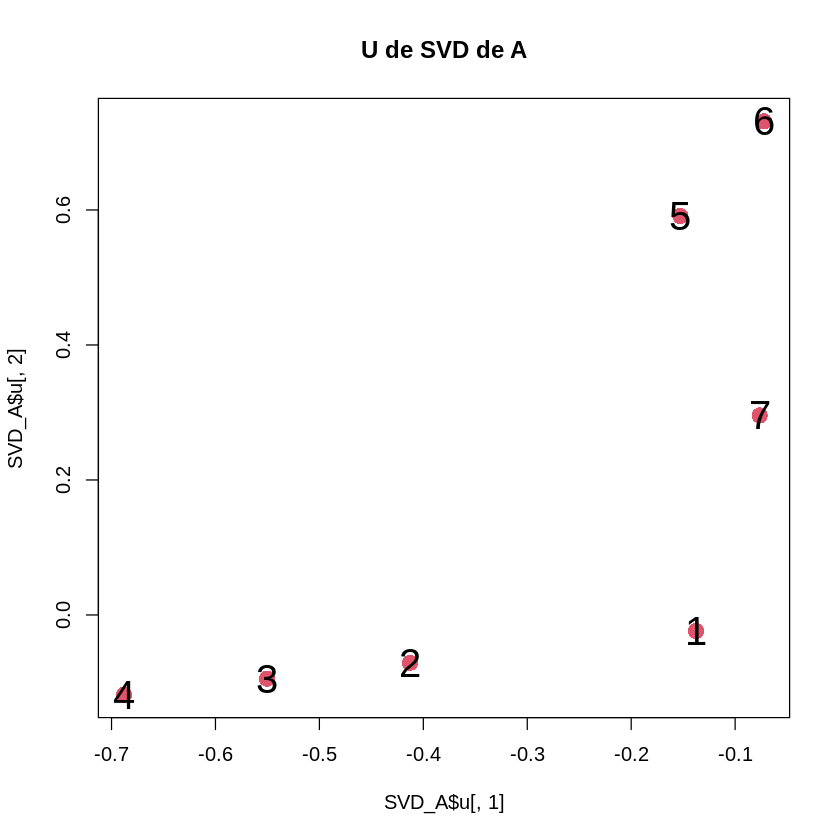

In [ ]:
plot(SVD_A$u[,1],SVD_A$u[,2], main = "U de SVD de A", cex = 1.8, pch=16, col = 2)
text(SVD_A$u[,1],SVD_A$u[,2], cex = 2)

Gráfica de SVD de $A_c$ $(V)$

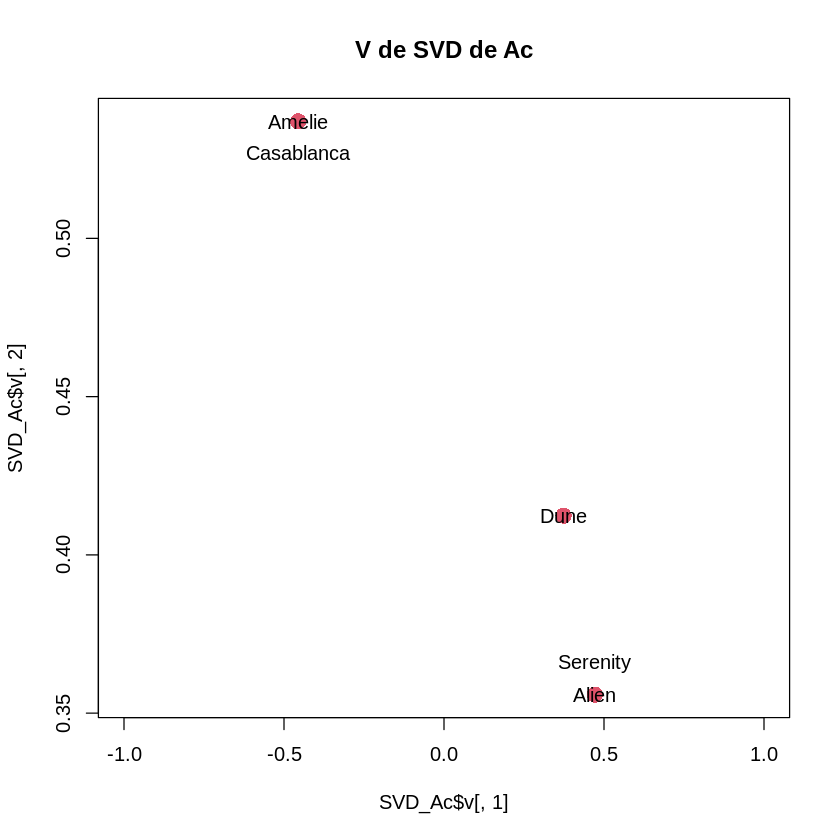

In [ ]:
plot(SVD_Ac$v[,1],SVD_Ac$v[,2], main = "V de SVD de Ac", cex = 1.8, pch=16, col = 2, xlim = c(-1,1))
text(SVD_Ac$v[,1],SVD_Ac$v[,2]-c(-.01,0,0,.01,0), colnames(A))

Gráfica de SVD de $A_c$ $(U)$

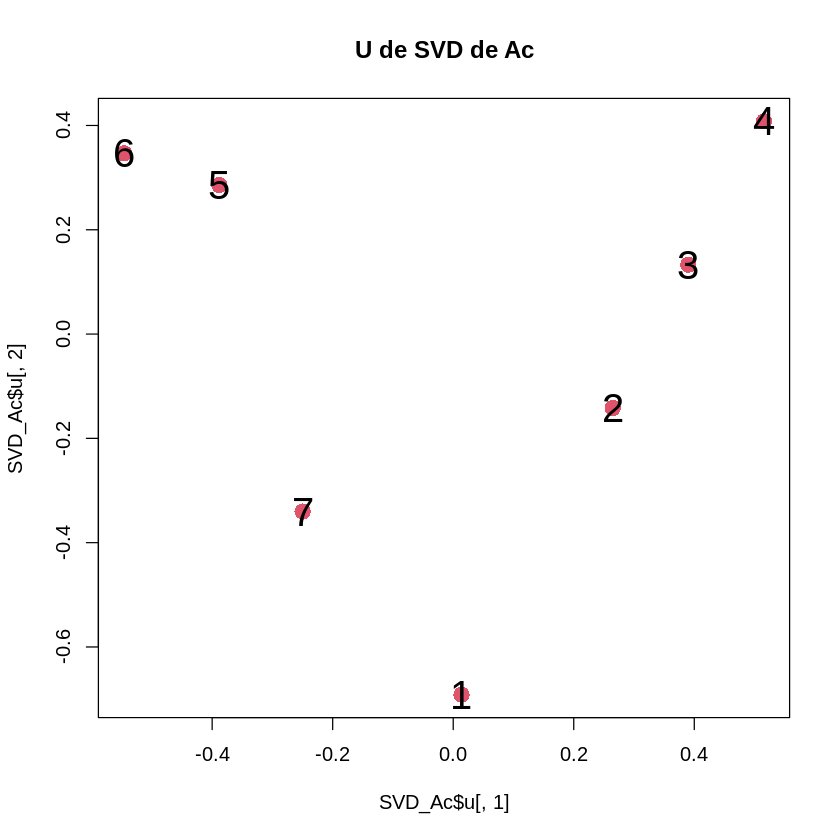

In [ ]:
plot(SVD_Ac$u[,1],SVD_Ac$u[,2], main = "U de SVD de Ac", cex = 1.8, pch=16, col = 2)
text(SVD_Ac$u[,1],SVD_Ac$u[,2], cex = 2)

SVD $(A^T)_c$

In [ ]:
Atc <- scale(t(A), center = TRUE, scale = FALSE)
SVD_Atc <- svd(Atc)
round(SVD_Atc$d,4)
round(SVD_Atc$u,4)
round(SVD_Atc$v,4)

[1] 10.4113  1.6747  0.0000  0.0000  0.0000

-0.3931,0.3814,0.2384,0.8020,0.0000
-0.3065,-0.8403,-0.2942,0.3368,0.0000
-0.3931,0.3814,-0.8268,-0.1283,0.0000
0.5463,0.0388,-0.2942,0.3368,-0.7071
0.5463,0.0388,-0.2942,0.3368,0.7071


-0.1050,-0.0463,0.5719,0.7511,-0.3093
-0.3149,-0.1389,0.4528,-0.0595,0.8204
-0.4198,-0.1852,-0.6753,0.5343,0.2190
-0.5248,-0.2314,0.0771,-0.2710,-0.3028
0.3609,-0.8184,0.0000,0.0000,0.0000
0.5248,0.2314,-0.0771,0.2710,0.3028
0.1805,-0.4092,0.0000,0.0000,0.0000


Gráfica de SVD de $(A^T)_c$ $(V)$

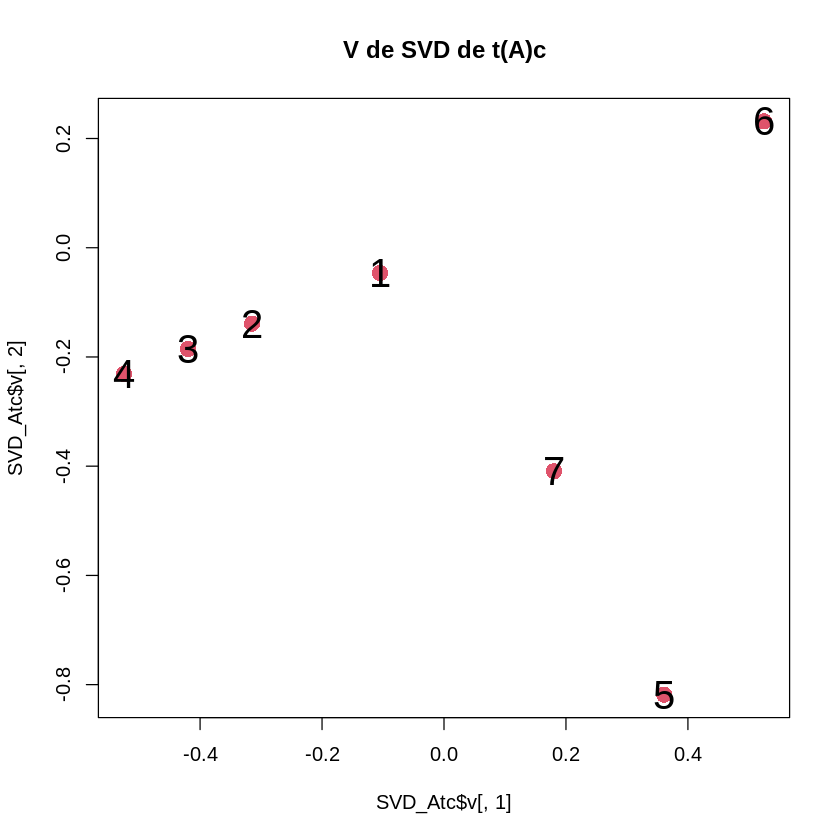

In [ ]:
plot(SVD_Atc$v[,1],SVD_Atc$v[,2], main = "V de SVD de t(A)c", cex = 1.8, pch=16, col = 2)
text(SVD_Atc$v[,1],SVD_Atc$v[,2], cex = 2)

Gráfica de SVD de $(A^T)_c$ $(U)$

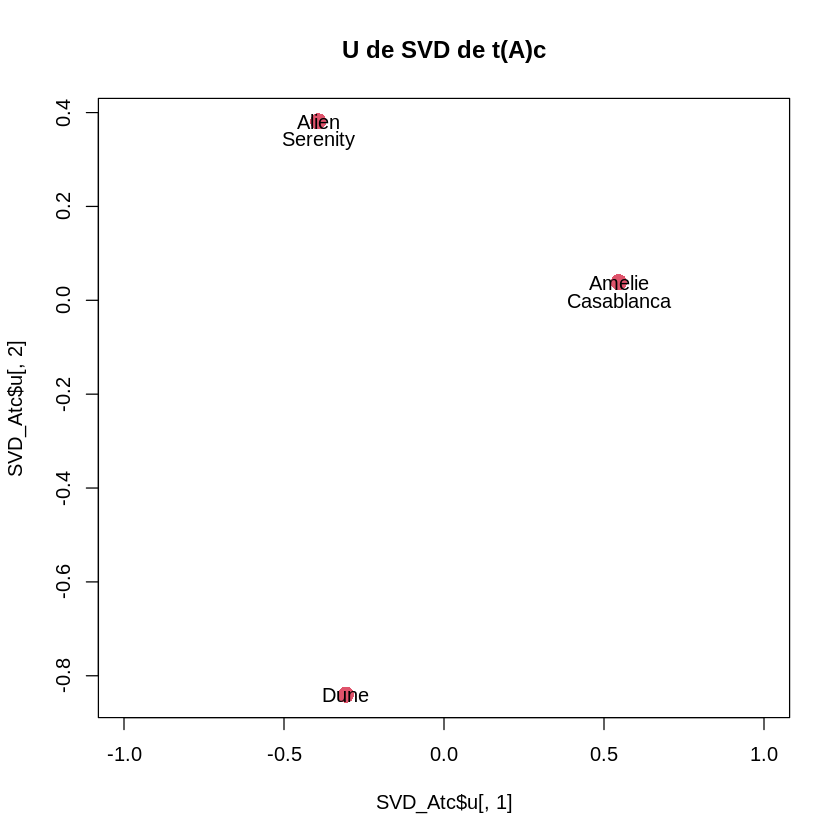

In [ ]:
plot(SVD_Atc$u[,1],SVD_Atc$u[,2], main = "U de SVD de t(A)c", cex = 1.8, pch=16, col = 2, xlim = c(-1,1))
text(SVD_Atc$u[,1],SVD_Atc$u[,2]-c(.04,0,0,.04,0), colnames(A))

###Observaciones sobre $U$

Observación 1

In [ ]:
PC <- princomp(A)$loadings

round(Ac %*% PC,4)
round(Ac %*% SVD_Ac$v,4)
round(SVD_Ac$u %*% diag(SVD_Ac$d),4)

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.1442,-2.8279,0.2087,0,0
2.7775,-0.5798,0.1018,0,0
4.0942,0.5443,0.0483,0,0
5.4109,1.6683,-0.0052,0,0
-4.0725,1.1687,-0.9077,0,0
-5.7318,1.4179,0.8769,0,0
-2.6225,-1.3916,-0.3228,0,0


0.1442,-2.8279,-0.2087,0,0
2.7775,-0.5798,-0.1018,0,0
4.0942,0.5443,-0.0483,0,0
5.4109,1.6683,0.0052,0,0
-4.0725,1.1687,0.9077,0,0
-5.7318,1.4179,-0.8769,0,0
-2.6225,-1.3916,0.3228,0,0


0.1442,-2.8279,-0.2087,0,0
2.7775,-0.5798,-0.1018,0,0
4.0942,0.5443,-0.0483,0,0
5.4109,1.6683,0.0052,0,0
-4.0725,1.1687,0.9077,0,0
-5.7318,1.4179,-0.8769,0,0
-2.6225,-1.3916,0.3228,0,0


Observación 2

In [ ]:
round((Ac %*% PC)/SVD_Ac$u,4)

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
10.4925,4.0897,-1.3241,0,0
10.4925,4.0897,-1.3241,0,0
10.4925,4.0897,-1.3241,0,0
10.4925,4.0897,-1.3241,0,0
10.4925,4.0897,-1.3241,0,0
10.4925,4.0897,-1.3241,0,0
10.4925,4.0897,-1.3241,0,0


Observación 3

In [ ]:
round((A %*% PC) - (Ac %*% PC),4)
round(colMeans(A) %*% PC,4)

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1.1725,3.9519,-0.2622,0,0
1.1725,3.9519,-0.2622,0,0
1.1725,3.9519,-0.2622,0,0
1.1725,3.9519,-0.2622,0,0
1.1725,3.9519,-0.2622,0,0
1.1725,3.9519,-0.2622,0,0
1.1725,3.9519,-0.2622,0,0


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1.1725,3.9519,-0.2622,0,0


Observación 4

In [ ]:
round(scale(SVD_Ac$u),4)
round(scale(A %*% PC),4)
round(scale(Ac %*% PC),4)

0.0337,-1.6937,-0.3861,-1.4541,-0.2896
0.6484,-0.3473,-0.1883,1.0691,-0.3556
0.9558,0.3260,-0.0894,0.3668,-1.3610
1.2632,0.9992,0.0096,-0.6441,1.3601
-0.9507,0.7000,1.6792,-0.6623,-0.6461
-1.3381,0.8493,-1.6221,0.0000,0.0000
-0.6122,-0.8335,0.5971,1.3246,1.2922


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.0337,-1.6937,0.3861,-0.3664,-1.1309
0.6484,-0.3473,0.1883,-0.0798,-0.7004
0.9558,0.3260,0.0894,-0.0225,-0.4852
1.2632,0.9992,-0.0096,0.1494,-0.2699
-0.9507,0.7000,-1.6792,1.5536,1.0629
-1.3381,0.8493,1.6221,-1.7706,1.6651
-0.6122,-0.8335,-0.5971,0.5363,-0.1416


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.0337,-1.6937,0.3861,-0.3902,-1.5054
0.6484,-0.3473,0.1883,-0.1314,-0.3861
0.9558,0.3260,0.0894,0.0411,-0.3861
1.2632,0.9992,-0.0096,0.1561,-0.3861
-0.9507,0.7000,-1.6792,1.5360,1.5248
-1.3381,0.8493,1.6221,-1.7701,0.9651
-0.6122,-0.8335,-0.5971,0.5585,0.1736


Observación 5

In [ ]:
round(scale(SVD_Ac$u, center = FALSE, scale = apply(SVD_Ac$u, 2, sd, na.rm = TRUE)),4)
round(scale(Ac %*% PC, center = FALSE, scale = apply(Ac %*% PC, 2, sd, na.rm = TRUE)),4)
round(scale(A %*% PC, center = FALSE, scale = apply(A %*% PC, 2, sd, na.rm = TRUE)),4)

0.0337,-1.6937,-0.3861,-1.9739,-0.0683
0.6484,-0.3473,-0.1883,0.5493,-0.1343
0.9558,0.3260,-0.0894,-0.1529,-1.1398
1.2632,0.9992,0.0096,-1.1639,1.5814
-0.9507,0.7000,1.6792,-1.1821,-0.4248
-1.3381,0.8493,-1.6221,-0.5198,0.2213
-0.6122,-0.8335,0.5971,0.8048,1.5135


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.0337,-1.6937,0.3861,-0.3744,-1.5660
0.6484,-0.3473,0.1883,-0.1157,-0.4466
0.9558,0.3260,0.0894,0.0568,-0.4466
1.2632,0.9992,-0.0096,0.1718,-0.4466
-0.9507,0.7000,-1.6792,1.5517,1.4643
-1.3381,0.8493,1.6221,-1.7544,0.9046
-0.6122,-0.8335,-0.5971,0.5743,0.1131


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.3074,0.6732,-0.0989,0.1146,0.2152
0.9221,2.0197,-0.2968,0.4012,0.6457
1.2295,2.6930,-0.3957,0.4585,0.8610
1.5369,3.3662,-0.4946,0.6305,1.0762
-0.6770,3.0670,-2.1642,2.0347,2.4090
-1.0644,3.2162,1.1370,-1.2896,3.0112
-0.3385,1.5335,-1.0821,1.0173,1.2045


Observación 6

In [ ]:
round(scale(A %*% PC, center = TRUE, scale = FALSE),4)
round(scale(Ac %*% PC, center = TRUE, scale = FALSE),4)
round(Ac %*% PC,4)
round(scale(SVD_Ac$u, center = TRUE, scale = FALSE),4)

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.1442,-2.8279,0.2087,0,0
2.7775,-0.5798,0.1018,0,0
4.0942,0.5443,0.0483,0,0
5.4109,1.6683,-0.0052,0,0
-4.0725,1.1687,-0.9077,0,0
-5.7318,1.4179,0.8769,0,0
-2.6225,-1.3916,-0.3228,0,0


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.1442,-2.8279,0.2087,0,0
2.7775,-0.5798,0.1018,0,0
4.0942,0.5443,0.0483,0,0
5.4109,1.6683,-0.0052,0,0
-4.0725,1.1687,-0.9077,0,0
-5.7318,1.4179,0.8769,0,0
-2.6225,-1.3916,-0.3228,0,0


Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
0.1442,-2.8279,0.2087,0,0
2.7775,-0.5798,0.1018,0,0
4.0942,0.5443,0.0483,0,0
5.4109,1.6683,-0.0052,0,0
-4.0725,1.1687,-0.9077,0,0
-5.7318,1.4179,0.8769,0,0
-2.6225,-1.3916,-0.3228,0,0


0.0137,-0.6915,-0.1576,-0.5176,-0.1150
0.2647,-0.1418,-0.0769,0.3806,-0.1412
0.3902,0.1331,-0.0365,0.1306,-0.5404
0.5157,0.4079,0.0039,-0.2293,0.5401
-0.3881,0.2858,0.6855,-0.2358,-0.2566
-0.5463,0.3467,-0.6622,0.0000,0.0000
-0.2499,-0.3403,0.2438,0.4715,0.5131
